# Generate Descriptive Statistics and Visualizations

In [0]:
import pandas as pd
import scipy.stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [0]:
boston_df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# **We will generate the following and explain our findings:**

- For the "Median value of owner-occupied homes" provide a boxplot
- Provide a  histogram for the Charles river variable
- Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
- Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
- Create a histogram for the pupil to teacher ratio variable

### 1: Median value of owner-occupied homes

Median value of owner-occupied homes in $1000's will be:

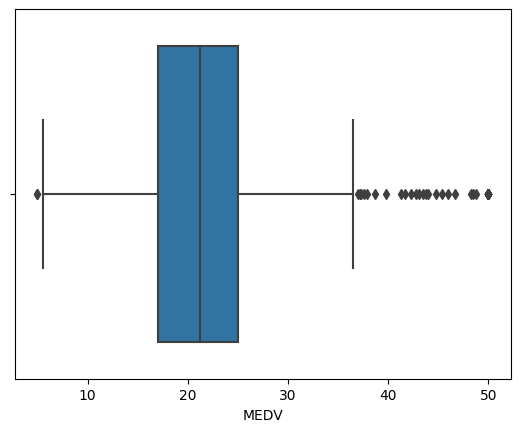

In [0]:
md = sns.boxplot(x='MEDV', data=boston_df)

### 2: Histogram for the Charles river variable

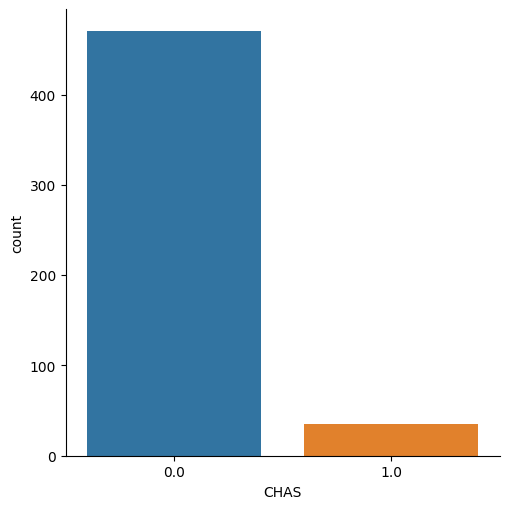

In [0]:
cr = sns.catplot(x='CHAS', kind='count', data=boston_df)

### 3: Boxplot for the MEDV variable vs the AGE variable

We will discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older

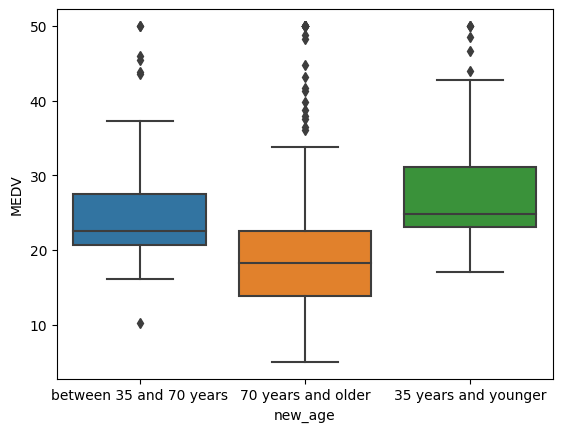

In [0]:
boston_df.loc[(boston_df.AGE <= 35), 'new_age'] = '35 years and younger'
boston_df.loc[(boston_df.AGE > 35)&(boston_df.AGE < 70), 'new_age'] = "between 35 and 70 years"
boston_df.loc[(boston_df.AGE >=70), 'new_age'] = "70 years and older"

ag = sns.boxplot(x='new_age', y='MEDV', data=boston_df)

### 4: Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

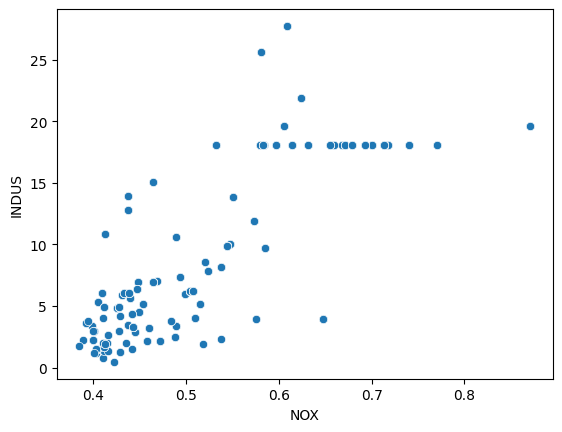

In [0]:
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)

### 5: Histogram for the pupil to teacher ratio variable

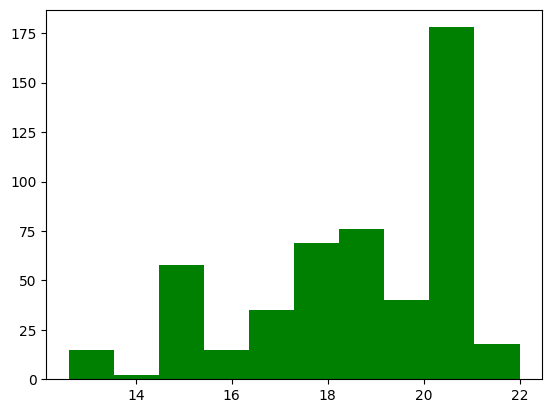

In [0]:
plt.hist(boston_df.PTRATIO, color='green')

# For each of the following questions;

- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

1. ### Significant difference in median value of houses
#### Hypothesis:
1. There is no difference in median value of houses bounded by the Charles river
2. There is a difference in median value of houses bounded by the Charles river

In [0]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

In [0]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

#### Conclusion:
Since the p-value is less than 0.05, we will reject the null hypothesis as there is enough proof that there is a statistical difference in median value of owner occupied homes based on Charles river variable

2. ### Difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940.
#### Hypothesis:
- All means(3) are equal.
- Atleast one mean is different.

In [0]:
scipy.stats.levene(boston_df[boston_df['new_age'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['new_age'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['new_age'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

#### Since, p-value is more than 0.05, the variance are equal.

In [0]:
younger = boston_df[boston_df['new_age'] == '35 years and younger']['MEDV']
middle = boston_df[boston_df['new_age'] == 'between 35 and 70 years']['MEDV']
older = boston_df[boston_df['new_age'] == '70 years and older']['MEDV']
# ANOVA test
f_statistic, p_value = scipy.stats.f_oneway(younger, middle, older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


#### Conclusion:
- Since, the p-value is less than 0.05, we will reject the null hypothesis as there is a significant evidence that at least one of the means differ.

### 3. Relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
#### Hypothesis:
- Both of them will nor correlate
- Both of them will correlate

In [0]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

#### Conclusion:
- Since the p-value < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between NOX and INDUS.

### 4. Impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
#### Hypothesis:
- DIS is not correlated with MEDV
- DIS is correlated with MEDV

In [0]:
X = boston_df['DIS']
y = boston_df['MEDV']
z = sm.add_constant(X) 

model = sm.OLS(y, z).fit()
predictions = model.predict(z)

model.summary()

OLS Regression Results 
 
 Dep. Variable: MEDV R-squared: 0.062 
 
 
 Model: OLS Adj. R-squared: 0.061 
 
 
 Method: Least Squares F-statistic: 33.58 
 
 
 Date: Sat, 24 Jul 2021 Prob (F-statistic): 1.21e-08 
 
 
 Time: 07:05:34 Log-Likelihood: -1823.9 
 
 
 No. Observations: 506 AIC: 3652. 
 
 
 Df Residuals: 504 BIC: 3660. 
 
 
 Df Model: 1 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 const 18.3901 0.817 22.499 0.000 16.784 19.996 
 
 
 DIS 1.0916 0.188 5.795 0.000 0.722 1.462 
 
 
 
 
 Omnibus: 139.779 Durbin-Watson: 0.570 
 
 
 Prob(Omnibus): 0.000 Jarque-Bera (JB): 305.104 
 
 
 Skew: 1.466 Prob(JB): 5.59e-67 
 
 
 Kurtosis: 5.424 Cond. No. 9.32 
 
 Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

#### Conclusion:
- Since the p-value < 0.05, we will reject the Null hypothesis and conclude that there exists a relationship between DIS and MEDV.